<a href="https://colab.research.google.com/github/zeroaioficial/data_marketing/blob/main/Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="10%" src="https://zeroai.com.br/wp-content/uploads/2021/09/cropped-cropped-logo_zero_preto.png">

##### **Discover | Projetos**
*by [Hyan Dias](https://www.linkedin.com/in/hyan-dias/)*


# **Churn Prediction**
____

---

*Churn rate*, ou simplesmente *churn*, representa a taxa de evasão da sua base de clientes. Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas.

<p align=center>
<img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/churnrate.jpg" width="60%"></p>

Ela é de extrema importância para a administração e sua análise ao longo do tempo pode mostrar que existe algum problema que deve ser atacado.

*Churn* também pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.

## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

In [ ]:
#!pip install scikit-plot -q
#!pip install imbalanced-learn -q

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, auc, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

!pip install -q scikit-plot
import scikitplot as skplt

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

sns.set_theme()

In [ ]:
df = pd.read_csv("https://www.dropbox.com/s/rjh00m4ooabp1gx/Telco-Customer-Churn.csv?dl=1")

**Dicionário das variáveis**

* `customerID` O número de identificação do cliente
* `gender` Gênero sexual
* `SeniorCitizen` Aposentado
* `Partner` Casado
* `Dependents`Possui dependentes/filhos
* `tenure` Tempo em meses que o cliente está utilizando os serviços
* `PhoneService` Utiliza serviço telefônico
* `MultipleLines` Possui multiplas linhas telefônicas
* `InternetService` Tipo do provedor de serviços de internet
* `OnlineSecurity` Possui serviço de segurança online
* `OnlineBackup` Possui serviço de backup onlie
* `DeviceProtection` Possui proteção de sistema
* `TechSupport` Possui serviço de suporte técnico 
* `StreamingTV` Possui Streaming de TV
* `StreamingMovies` Possui Streaming de filmes
* `Contract` Tipo de contrato do cliente
* `PaperlessBilling` Não utiliza boleto impresso
* `PaymentMethod` Método de pagamento
* `MonthlyCharges` Valor mensal dos serviços
* `TotalCharges` Valor total dos serviços do periodo contratado
* `Churn` O cliente abandonou o serviço

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataframe*, analisando as 5 primeiras entradas.

In [ ]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# identificar o volume de dados do DataFrame
print(f'Entradas: {df.shape[0]}\nVariáveis: {df.shape[1]}\n')
print(f'\033[1mTipo dos dados por variáveis\033[0m')
display(df.dtypes)

Entradas: 7043
Variáveis: 21

Tipo dos dados por variáveis


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df_clean = df.copy()
df_clean.drop("customerID", axis=1, inplace=True)

# converter as strings de TotalCharges para float
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'],errors = 'coerce')

In [ ]:
df_clean.isnull().sum() / df_clean.shape[0]

gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

In [ ]:
# verificar entradas ausentes
print("Dados ausentes em 'TotalCharges' (antes):\t{}\n".format(df_clean["TotalCharges"].isnull().sum()))

# substituir os dados ausentes pelo valor da mediana
TotalChargesMedian = df_clean.TotalCharges.median()
df_clean["TotalCharges"].fillna(TotalChargesMedian, inplace=True)

Dados ausentes em 'TotalCharges' (antes):	11



O SeniorCitizen é um valor entre 0 (não aposentado) 1 (aposentado)

In [ ]:
#valores unicos, ver quais as posibilidades categoricas por variavel
df_clean.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


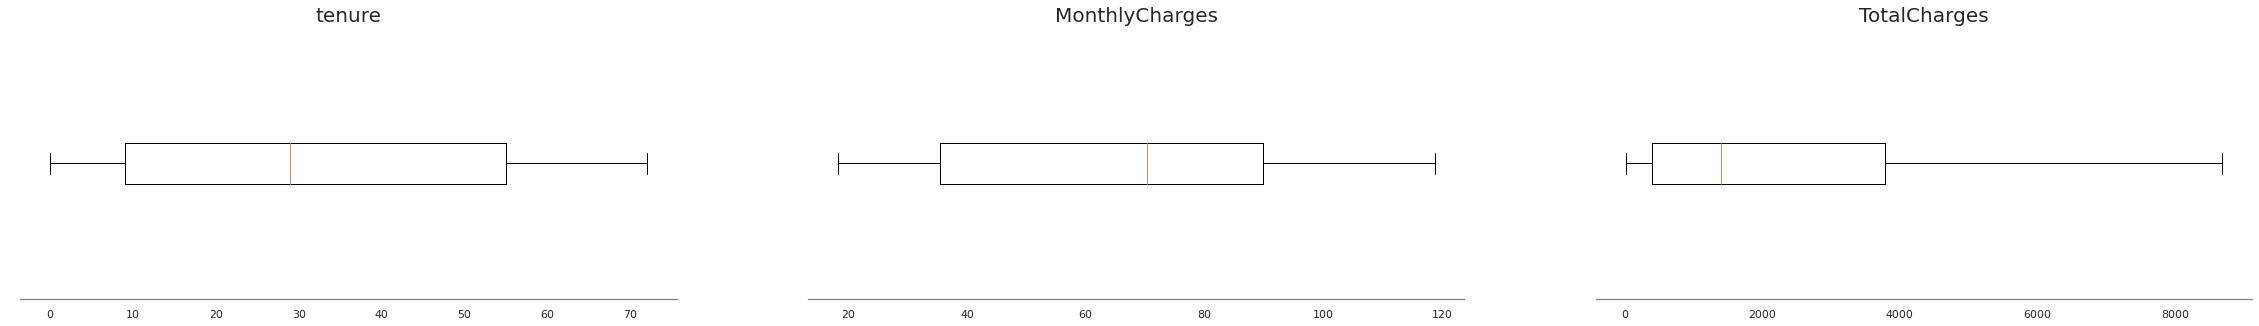

In [ ]:
dx0 = ['tenure',	'MonthlyCharges',	'TotalCharges']

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize= (40,5))
matplotlib.rcParams['axes.linewidth'] = 0.1
cont_col = 0

for n in dx0:
    ax[cont_col].boxplot(df_clean[n], vert=False, labels=' ')
    ax[cont_col].set_title(n, fontsize=20)
    ax[cont_col].set_facecolor('White')
    ax[cont_col].spines['bottom'].set_color('gray')

    cont_col = cont_col + 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Unrecognized location 'upper'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # This is added back by InteractiveShellApp.init_path()


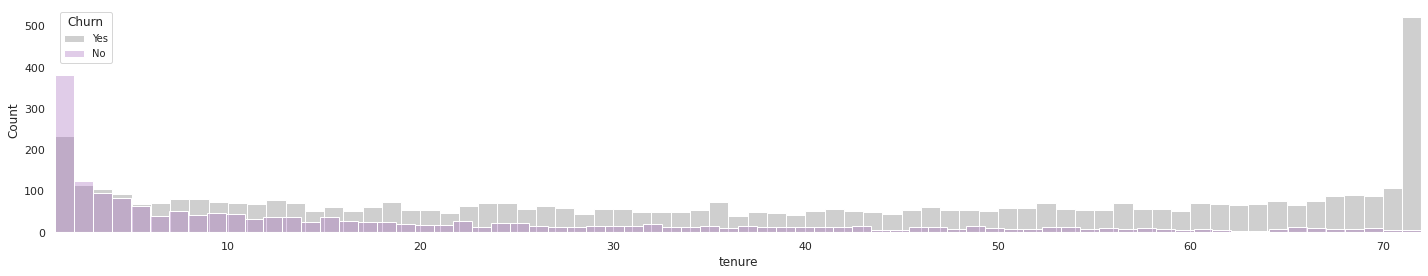

In [ ]:
df_yes = df_clean[df_clean.Churn == "Yes"]
df_no = df_clean[df_clean.Churn == "No"]

fig, ax = plt.subplots(figsize=(20, 4))

sns.histplot(df_no['tenure'], color="silver", bins=72)
sns.histplot(df_yes['tenure'], color="#9b59b6", bins=72, alpha=0.3)
ax.set_facecolor('White')
plt.xlim([1, 72])
plt.xlabel("tenure")
plt.legend(title='Churn', loc='upper', labels=['Yes', 'No'], prop={"size":10}, facecolor="white", framealpha=0.8)
plt.tight_layout()

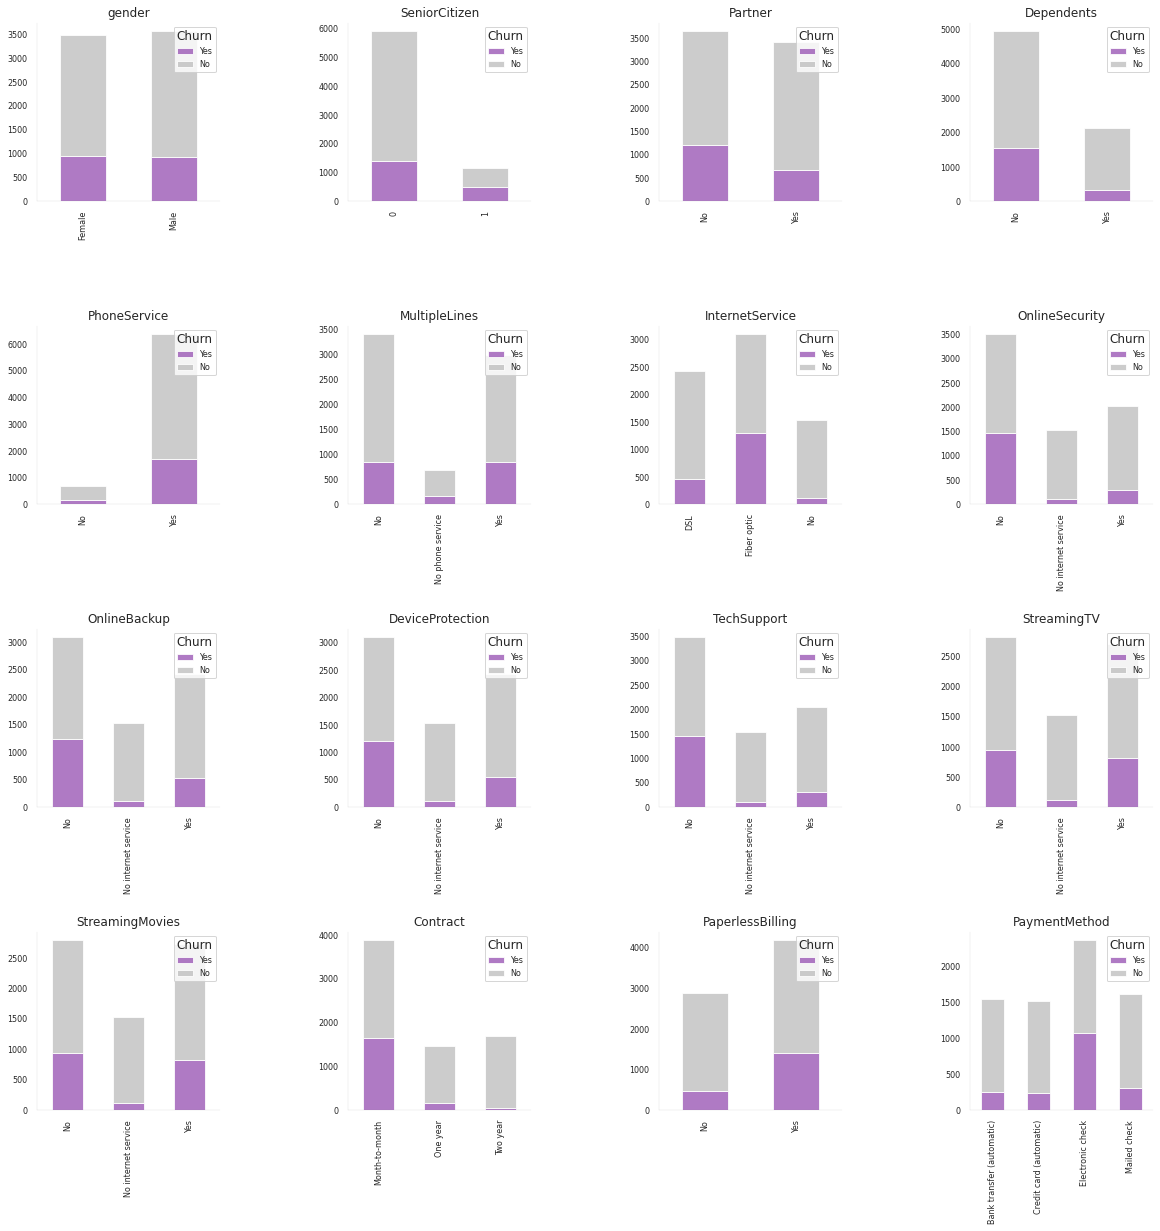

In [ ]:
doc = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
       'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize = (20,20))
plt.subplots_adjust(wspace=0.7, hspace=0.7)
matplotlib.rcParams['axes.linewidth'] = 0.1

cont_row = 0
cont_col = 0


for n in doc:
  df2 = df_clean.groupby([n, 'Churn'])[n].count().unstack('Churn').fillna(0)
  df2[['Yes','No']].plot(kind='bar', stacked=True, ax=ax[cont_row, cont_col], color=["#9b59b6", "silver"], fontsize=8, title=n, xlabel='', alpha=0.8)

  ax[cont_row, cont_col].set_facecolor('White')
  ax[cont_row, cont_col].legend(title='Churn', loc='upper right', labels=['Yes', 'No'], prop={"size":8}, facecolor="white", framealpha=0.8)
  ax[cont_row, cont_col].spines['left'].set_color('gray')
  ax[cont_row, cont_col].spines['bottom'].set_color('gray')

  if cont_col == 3:
    cont_col = 0
    cont_row = cont_row + 1
  else:
    cont_col = cont_col + 1

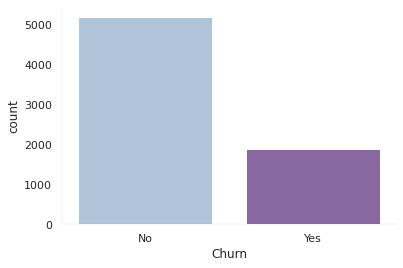

In [ ]:
fig, ax = plt.subplots()

sns.countplot(df.Churn, ax=ax, palette='BuPu')
ax.set_facecolor('White')
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')

PReparação e conversão

In [ ]:
#Armazenando as variáveis binárias
binary = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()

#Armazenando as variáveis numéricas
numeric = [col for col in df_clean.select_dtypes(['int', 'float']).columns.tolist() if col not in binary]

#Armazenando as variáveis categoricas não binária
cat_nbi = [col for col in df_clean.columns.tolist() if col not in binary + numeric]

In [ ]:
# criar uma cópia do dataframe
df_proc = df_clean.copy()

# Label Encoding para as variáveis Binárias
le = LabelEncoder()
for i in binary:
    df_proc[i] = le.fit_transform(df_proc[i])

# Encoding para colunas categóricas com múltiplas classes
df_proc = pd.get_dummies(df_proc, columns=cat_nbi)

# ver as 5 primeiras entradas do novo dataframe
df_proc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


modelo

In [ ]:
#separa a coluna Churn (resposta) do dataset
X = df_proc.drop('Churn', axis=1)
y = df_proc.Churn

#separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
def val_model(X, y, clf, quite=False):
  """
  Realiza cross-validation com os dados de treino para determinado modelo.
  # Arguments
  X: DataFrame, contém as variáveis independetes.
  y: Series, vetor contendo a variável alvo.
  clf: modelo classificador do Scikit-learn.
  quite: bool, indicando se a função deve imprimir os resultados ou não.
  
  # Returns
  float, média dos scores da cross-validation."""

  X = np.array(X)
  y = np.array(y)
  
  pipeline = make_pipeline(StandardScaler(), clf)
  scores = cross_val_score(pipeline, X, y, scoring='recall')

  if quite == False:
    print("Recall: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))
  
  return scores.mean()

In [ ]:
rf = RandomForestClassifier()

#https://scikit-learn.org/stable/modules/ensemble.html
#usei esse estimador como teste

'''from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
rf = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)'''

score_baseline = val_model(X_train, y_train, rf)

Recall: 0.49 (+/- 0.02)


In [ ]:
#  padronizar os  dados,
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [ ]:
#RUS (Random Under Sampling)
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
score_baseline_rus = val_model(X_train_rus, y_train_rus, rf)

Recall: 0.74 (+/- 0.02)


In [ ]:
#Over-Sampling (SMOTE)
from imblearn.over_sampling import SMOTE
smo = SMOTE()
X_train_smo, y_train_smo = smo.fit_resample(X_train, y_train)
score_baseline_smo = val_model(X_train_smo, y_train_smo, rf)

Recall: 0.87 (+/- 0.13)


In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)
score_baseline_ada = val_model(X_train_ada, y_train_ada, rf)

Recall: 0.86 (+/- 0.11)


In [ ]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()
X_train_nr, y_train_nr = nr.fit_resample(X_train, y_train)
score_baseline_ada = val_model(X_train_nr, y_train_nr, rf)

Recall: 0.69 (+/- 0.03)


Irei aplicar a validação cruzada a vários modelos, a fim de identificar o seu desempenho e escolher o(s) melhor(es). Novamente, serão utilizados apenas dados de treino. Os modelos escolhidos são:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
#usei o ADASYn pq teve o menho erro
# instanciar modelos
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

model = []
recall = []
# avaliar o desempenho (recall)
for clf in (rf, dt, sgdc, svc, lr, xgb, lgbm):
    model.append(clf.__class__.__name__)
    recall.append(val_model(X_train_ada, y_train_ada, clf, quite=True))

pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
RandomForestClassifier,0.869684
DecisionTreeClassifier,0.747378
SGDClassifier,0.747975
SVC,0.843454
LogisticRegression,0.789876
XGBClassifier,0.841283
LGBMClassifier,0.824821


Otimização dos Hiperparâmetros
Random Florest possui inúmeros parâmetros. Alguns afetam mais a qualidade do modelo, outros menos. Uma boa prática é definir uma taxa de aprendizado e número de estimadores, realizar tuning de outros parâmetros e, no final, checar outras taxas de aprendizado.

Abaixo, irei ajustar o número de estimadores. O modelo foi instanciado com a learning_rate=0.1.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestClassifier()

param_grid = {
 'n_estimators':range(0,1000,50),
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(rf, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_ada, y_train_ada)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 392, in fit
    self._validate_estimator()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_base.py", line 140, in _validate_estimator
    self.n_estimators
ValueError: n_estimators must be greater than zero, got 0.

  

Melhor: 0.885914837180428 para {'n_estimators': 750}


In [ ]:
rf = RandomForestClassifier(n_estimators=750)

param_grid = {
 'max_depth':range(1,8,1)
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(rf, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_ada, y_train_ada)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.874237400530504 para {'max_depth': 7}


In [ ]:
rf = RandomForestClassifier(n_estimators=750, max_depth=7)

param_grid = {
    'min_samples_split':range(1,8,1),
    'min_samples_leaf':range(1,8,1)
}

# identificar melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(rf, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_ada, y_train_ada)

# ver resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 490.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

Melhor: 0.8745068852644055 para {'min_samples_leaf': 1, 'min_samples_split': 7}


In [ ]:
from scikitplot.metrics import plot_confusion_matrix, plot_roc

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1323
           1       0.50      0.77      0.61       438

    accuracy                           0.75      1761
   macro avg       0.71      0.76      0.71      1761
weighted avg       0.81      0.75      0.77      1761

AUC: 0.7596



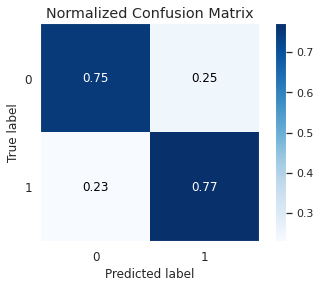

In [ ]:
rf = RandomForestClassifier(n_estimators=750, max_depth=7, min_samples_split=2, min_samples_leaf=7)
rf.fit(X_train_ada, y_train_ada)

# fazer a previsão
X_test = scaler.transform(X_test)
y_pred = rf.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# plotar matriz de confusão
plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()